<a href="https://colab.research.google.com/github/avichaljn97/CommunityDetection/blob/main/GN_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import urllib.request as urllib
import io
import zipfile
import time
from networkx.algorithms.community.centrality import girvan_newman
import itertools
import numpy as np
import matplotlib.cm as cm

In [ ]:
def karate_club():
  G = nx.karate_club_graph()
  G0 = nx.karate_club_graph()
  G1 = nx.karate_club_graph()
  return G,G0,G1

In [ ]:
def astro_physics():
  G = nx.read_edgelist('CA-AstroPh.txt', create_using=nx.Graph(), nodetype=int)
  G0 = nx.read_edgelist('CA-AstroPh.txt', create_using=nx.Graph(), nodetype=int)
  G1 = nx.read_edgelist('CA-AstroPh.txt', create_using=nx.Graph(), nodetype=int)
  return G,G0,G1

In [ ]:
def condensed_matter():
  G = nx.read_edgelist('CA-CondMat.txt', create_using=nx.Graph(), nodetype=int)
  G0 = nx.read_edgelist('CA-CondMat.txt', create_using=nx.Graph(), nodetype=int)
  G1 = nx.read_edgelist('CA-CondMat.txt', create_using=nx.Graph(), nodetype=int)
  return G,G0,G1

In [ ]:
def general_relativity():
  G = nx.read_edgelist('CA-GrQc.txt', create_using=nx.Graph(), nodetype=int)
  G0 = nx.read_edgelist('CA-GrQc.txt', create_using=nx.Graph(), nodetype=int)
  G1 = nx.read_edgelist('CA-GrQc.txt', create_using=nx.Graph(), nodetype=int)
  
  return G,G0,G1

In [ ]:
def he_physics():
  G = nx.read_edgelist('CA-HepPh.txt', create_using=nx.Graph(), nodetype=int)
  G0 = nx.read_edgelist('CA-HepPh.txt', create_using=nx.Graph(), nodetype=int)
  G1 = nx.read_edgelist('CA-HepPh.txt', create_using=nx.Graph(), nodetype=int)
  return G,G0,G1

In [ ]:
def heT_physics():
  G = nx.read_edgelist('CA-HepTh.txt', create_using=nx.Graph(), nodetype=int)
  G0 = nx.read_edgelist('CA-HepTh.txt', create_using=nx.Graph(), nodetype=int)
  G1 = nx.read_edgelist('CA-HepTh.txt', create_using=nx.Graph(), nodetype=int)
  
  return G,G0,G1

In [ ]:
def facebook():
  G = nx.read_edgelist('email-Eu-core.txt', create_using=nx.Graph(), nodetype=int)
  G0 =G
  G1 = G
  c = [G.subgraph(c).copy() for c in nx.connected_components(G)]
  f = plt.figure()
  f.set_figwidth(20)
  f.set_figheight(20)
  nx.draw(c[0], with_labels=True)
  plt.show()
  return c[0],c[0],c[0]

In [ ]:
def facebook1000():
  G = nx.read_edgelist('', create_using=nx.Graph(), nodetype=int)
  G0 = nx.read_edgelist('', create_using=nx.Graph(), nodetype=int)
  G1 = nx.read_edgelist('', create_using=nx.Graph(), nodetype=int)
  
  List=[*range(0,1000)]
  G=G.subgraph(List)
  G0=G0.subgraph(List)
  G1=G1.subgraph(List)
  
  return G,G0,G1

In [ ]:
def football():
  url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"
  
  sock = urllib.urlopen(url)
  s = io.BytesIO(sock.read())
  sock.close()

  zf = zipfile.ZipFile(s)
  txt = zf.read("football.txt").decode()
  gml = zf.read("football.gml").decode()
  gml = gml.split("\n")[1:]
  G = nx.parse_gml(gml)
  G0 = nx.parse_gml(gml)
  G1 = nx.parse_gml(gml)
  return G,G0,G1

In [ ]:
def davis_southern_women_graph():
  G=nx.davis_southern_women_graph()
  G0=nx.davis_southern_women_graph()
  G1=nx.davis_southern_women_graph()
  return G,G0,G1

In [ ]:
def florentine_families_graph():
  G=nx.florentine_families_graph()
  G0=nx.florentine_families_graph()
  G1=nx.florentine_families_graph()
  return G,G0,G1

In [ ]:
def girvan_algo1(G,list_of_tuples):
  c = [G.subgraph(c).copy() for c in nx.connected_components(G)]
  l = len(c)
  removed_edges=[]
  while l == 1 and len(list_of_tuples)>0:
      x = max(list_of_tuples, key = lambda i : i[1])
      removed_edges.append(x[0])
      G.remove_edge(*x[0])
      c = [G.subgraph(c).copy() for c in nx.connected_components(G)]
      l = len(c)
      list_of_tuples.remove(x)
  return c, removed_edges

In [ ]:
def girvan_algo2(G,list_of_tuples,k):
    c = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    l = len(c)
    removed_edges=[]
    while l == 1 and len(list_of_tuples)>0:
        x = max(list_of_tuples, key= lambda i : i[1])
        G.remove_edge(*x[0])
        c = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        l = len(c)
        if l==2 and (len(c[0].nodes)<k or len(c[1].nodes)<k):
          G.add_edge(*x[0])
          c = [G.subgraph(c).copy() for c in nx.connected_components(G)]
          l = len(c)
        elif l==2 and (len(c[0].nodes)>=k and len(c[1].nodes)>=k):
          removed_edges.append(x[0])
        else:
          removed_edges.append(x[0])
        list_of_tuples.remove(x)
    return c, removed_edges

In [ ]:
def print_subgraph(c,G):
    print("\nThe components are:")
    for i in c:
      f = plt.figure()
      f.set_figwidth(7)
      f.set_figheight(7)
      nx.draw(G.subgraph(i).copy(), with_labels=True)
      plt.show()
      print ("\n")
      print ('...................................................')

In [ ]:
def removing_edges_from_graph(G1,edges):
    for each in edges:
        G1.remove_edge(*each)
    return G1

In [ ]:
def partition(c):
  partition = {}
  for i, s in enumerate(c):
      for si in s:
          partition[si] = i
  return partition

In [ ]:
def finding_modularity(part,G):
  mod=0
  mod = community.modularity(partition=part, graph=G)
  #print("\nModularity of graph: ", mod)
  return mod

In [ ]:
def Girvan_Newman(G,k):
  op= girvan_newman(G)
  lvl_mod=[]
  limited = itertools.takewhile(lambda c: len(c) <= k, op)
  for communities in limited:
    component=(tuple(sorted(c) for c in communities))
  part = partition(tuple(sorted(c) for c in component))
  mod = finding_modularity(part,G)
  lvl_mod.append(mod)
  return lvl_mod,part

In [ ]:
def Louis(G):
  part=community.best_partition(G)
  mod=finding_modularity(part,G)
  return mod,part,len(set(part.values()))

In [ ]:
def calc_algo1(G,G0,G1):
  lvl = 0
  temp = []
  lvl_modularity=[]
  leaf_nodes=[]
  c = [G0.subgraph(c).copy() for c in nx.connected_components(G0)]
  leaf_nodes=leaf_nodes+c
  mod=0
  part={}
  while True:
    print("\n\nLEVEL ",lvl)
    print("Number of communities in the partition:  ",len(set(part.values())))
    print("Modularity of the graph:  ",mod)
    edge_list=[]
    for each in leaf_nodes:
        if(len(each.edges()) == 0):
            temp.append(each)
        else:
            bdict = nx.edge_betweenness_centrality(each)
            list_of_tuples = [item for item in bdict.items()]
            c, l = girvan_algo1(each,list_of_tuples)
            if len(c)==1 :
              temp.append(c[0])
            else:
              temp.append(c[0])
              temp.append(c[1])
            edge_list = edge_list+l
    part = partition(temp)
    mod = finding_modularity(part,G)
    if lvl==0:
      G1=removing_edges_from_graph(G1,edge_list)
      lvl+=1
      lvl_modularity.append(mod)
      leaf_nodes = temp
      temp = []
    elif mod >= lvl_modularity[lvl-1]:
        G1=removing_edges_from_graph(G1,edge_list)
        lvl += 1
        lvl_modularity.append(mod)
        leaf_nodes = temp
        temp = []
    else:
        break
  print("\n\nLEVEL ",lvl+1)
  print("Number of communities in the partition:  ",len(set(part.values())))
  print("Modularity of the graph:  ",mod)
  return lvl_modularity,len([G1.subgraph(c).copy() for c in nx.connected_components(G1)]),G1,mod

In [ ]:
def calc_algo2(G,G0,G1,k):
  lvl = 0
  temp = []
  lvl_modularity=[]
  leaf_nodes=[]
  c = [G0.subgraph(c).copy() for c in nx.connected_components(G0)]
  leaf_nodes=leaf_nodes+c
  mod=0
  part={}
  while True:
    print("\n\nLEVEL ",lvl)
    print("Number of communities in the partition:  ",len(set(part.values())))
    print("Modularity of the graph:  ",mod)
    prev_part=len([G1.subgraph(c).copy() for c in nx.connected_components(G1)])
    edge_list=[]
    for each in leaf_nodes:
        if(len(each.edges()) == 0):
            temp.append(each)
        else:
            bdict = nx.edge_betweenness_centrality(each)
            list_of_tuples = [item for item in bdict.items()]
            c, l = girvan_algo2(each,list_of_tuples,k)
            if len(c)==1 :
              temp.append(c[0])
            else:
              temp.append(c[0])
              temp.append(c[1])
            edge_list = edge_list+l
    part = partition(temp)
    if prev_part==len(set(part.values())):
      break
    mod = finding_modularity(part,G)
    if lvl==0:
      removing_edges_from_graph(G1,edge_list)
      lvl+=1
      lvl_modularity.append(mod)
      leaf_nodes = temp
      temp = []
    elif mod >= lvl_modularity[lvl-1]:
        removing_edges_from_graph(G1,edge_list)
        lvl += 1
        lvl_modularity.append(mod)
        leaf_nodes = temp
        temp = []
    else:
        break
  print("\n\nLEVEL ",lvl+1)
  print("Number of communities in the partition:  ",len(set(part.values())))
  print("Modularity of the graph:  ",mod)
  return lvl_modularity,len([G1.subgraph(c).copy() for c in nx.connected_components(G1)]),G1,mod,partition([c for c in nx.connected_components(G1)])

In [ ]:
def get_func(i):
  if i==0:
    return football()
  if i==1:
    return karate_club()
  if i==3:
    return facebook1000()
  if i==2:
    return facebook()
  if i==4:
    return general_relativity()
  if i==5:
    return heT_physics()

In [ ]:
def min_nodes(n):
  if n<=50:
    return int(n*0.1)
  elif n<=300:
    return int(n*0.05)
  elif n<=1000:
    return int(n*0.03)
  else:
    return int(n*0.01)



LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   -0.00016100316950035337


LEVEL  2
Number of communities in the partition:   3
Modularity of the graph:   0.38544557959810416


LEVEL  3
Number of communities in the partition:   5
Modularity of the graph:   0.4938180105330668


LEVEL  4
Number of communities in the partition:   9
Modularity of the graph:   0.5653819234689397


LEVEL  5
Number of communities in the partition:   16
Modularity of the graph:   0.5121457597619814


Final number of communities is:   9
Modularity values for every level of partitioning:
 [-0.00016100316950035337, 0.38544557959810416, 0.4938180105330668, 0.5653819234689397]
Modularity of the next level:
 0.5121457597619814


Number of the components in the partition:   10
Modularity of graph:   0.6044285185845559


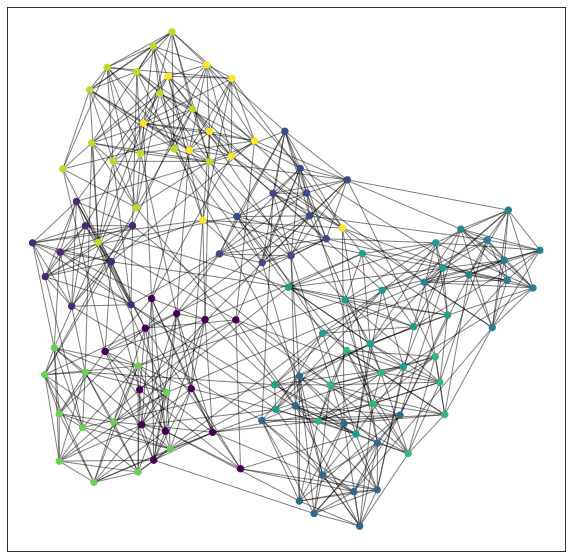



Threshold=  5.0 %


LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   0.3845926619811639


LEVEL  2
Number of communities in the partition:   4
Modularity of the graph:   0.5300290870188866


LEVEL  3
Number of communities in the partition:   8
Modularity of the graph:   0.5566212220805867


LEVEL  4
Number of communities in the partition:   13
Modularity of the graph:   0.5144077877632269


Final number of communities is:   8
Modularity values for every level of partitioning:
 [0.3845926619811639, 0.5300290870188866, 0.5566212220805867]
Modularity of the next level:
 0.5144077877632269





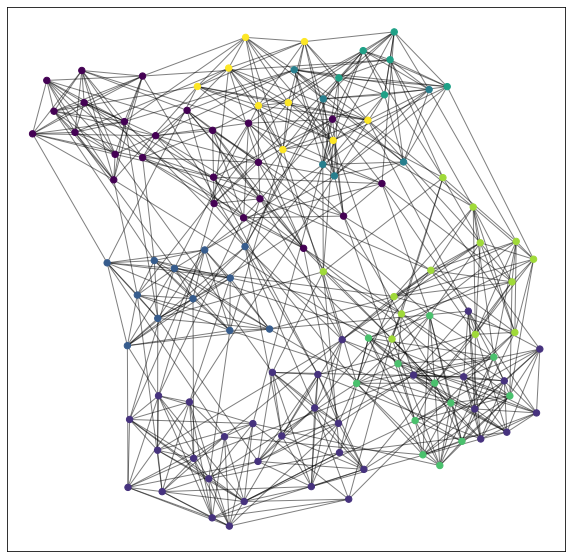



Threshold=  10.0 %


LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   0.3845926619811639


LEVEL  2
Number of communities in the partition:   4
Modularity of the graph:   0.5300290870188866


LEVEL  3
Number of communities in the partition:   7
Modularity of the graph:   0.5647964573980291


LEVEL  4
Number of communities in the partition:   8
Modularity of the graph:   0.5839411979168052


LEVEL  5
Number of communities in the partition:   8
Modularity of the graph:   0.5839411979168052


Final number of communities is:   8
Modularity values for every level of partitioning:
 [0.3845926619811639, 0.5300290870188866, 0.5647964573980291, 0.5839411979168052]
Modularity of the next level:
 0.5839411979168052





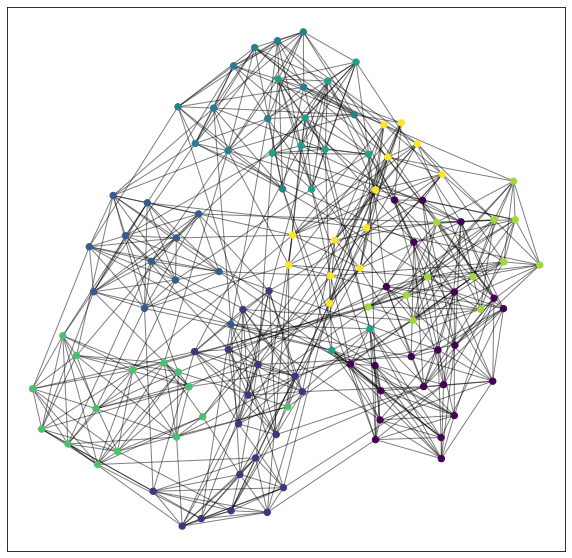



Threshold=  15.000000000000002 %


LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   0.3845926619811639


LEVEL  2
Number of communities in the partition:   4
Modularity of the graph:   0.5373420904864424


LEVEL  3
Number of communities in the partition:   5
Modularity of the graph:   0.5799161186792949


LEVEL  4
Number of communities in the partition:   5
Modularity of the graph:   0.5799161186792949


Final number of communities is:   5
Modularity values for every level of partitioning:
 [0.3845926619811639, 0.5373420904864424, 0.5799161186792949]
Modularity of the next level:
 0.5799161186792949





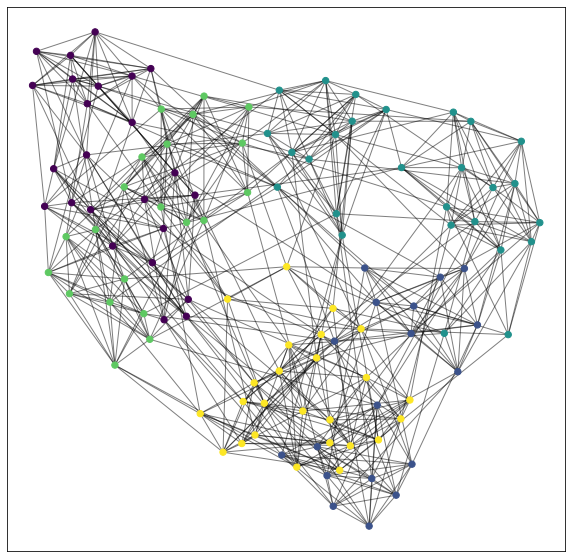



LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   -8.21827744905179e-05


LEVEL  2
Number of communities in the partition:   3
Modularity of the graph:   0.13141025641025628


LEVEL  3
Number of communities in the partition:   5
Modularity of the graph:   0.3735207100591716


LEVEL  4
Number of communities in the partition:   9
Modularity of the graph:   0.32158119658119655


Final number of communities is:   5
Modularity values for every level of partitioning:
 [-8.21827744905179e-05, 0.13141025641025628, 0.3735207100591716]
Modularity of the next level:
 0.32158119658119655


Number of the components in the partition:   4
Modularity of graph:   0.4151051939513477


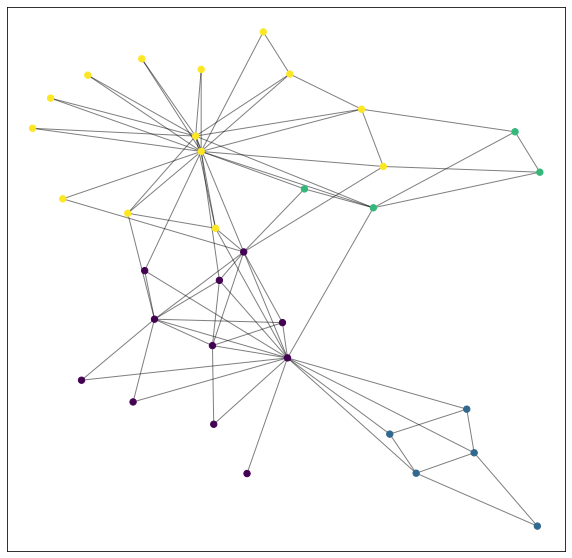



Threshold=  5.0 %


LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   -8.21827744905179e-05


LEVEL  2
Number of communities in the partition:   3
Modularity of the graph:   0.13141025641025628


LEVEL  3
Number of communities in the partition:   5
Modularity of the graph:   0.3735207100591716


LEVEL  4
Number of communities in the partition:   9
Modularity of the graph:   0.32158119658119655


Final number of communities is:   5
Modularity values for every level of partitioning:
 [-8.21827744905179e-05, 0.13141025641025628, 0.3735207100591716]
Modularity of the next level:
 0.32158119658119655





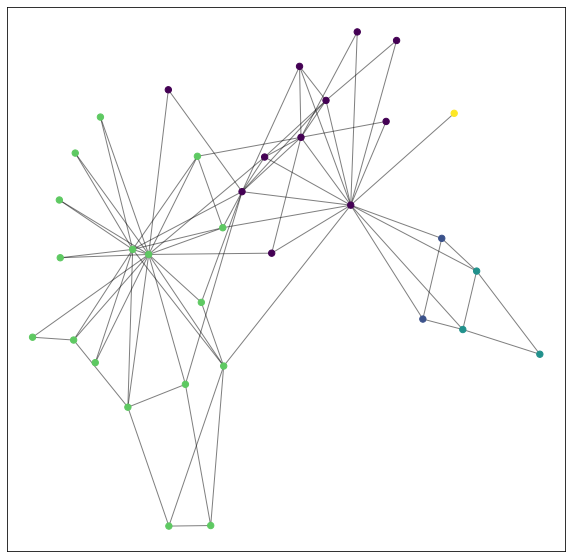



Threshold=  10.0 %


LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   0.13280736357659434


LEVEL  2
Number of communities in the partition:   3
Modularity of the graph:   0.4020381328073636


LEVEL  3
Number of communities in the partition:   5
Modularity of the graph:   0.37516436554898097


Final number of communities is:   3
Modularity values for every level of partitioning:
 [0.13280736357659434, 0.4020381328073636]
Modularity of the next level:
 0.37516436554898097





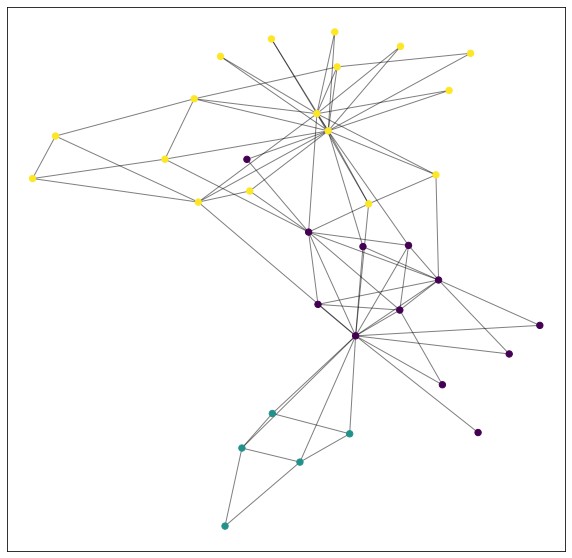



Threshold=  15.000000000000002 %


LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   0.13280736357659434


LEVEL  2
Number of communities in the partition:   3
Modularity of the graph:   0.4020381328073636


LEVEL  3
Number of communities in the partition:   5
Modularity of the graph:   0.29026955950032873


Final number of communities is:   3
Modularity values for every level of partitioning:
 [0.13280736357659434, 0.4020381328073636]
Modularity of the next level:
 0.29026955950032873





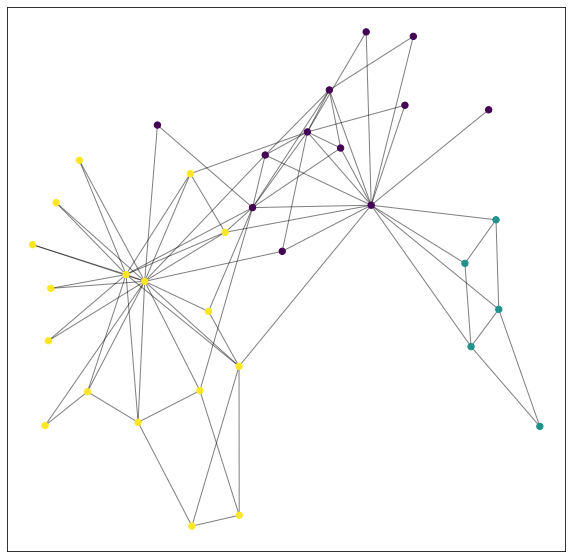



Threshold=  20.0 %


LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


LEVEL  1
Number of communities in the partition:   2
Modularity of the graph:   0.11760355029585795


LEVEL  2
Number of communities in the partition:   3
Modularity of the graph:   0.36365877712031563


LEVEL  3
Number of communities in the partition:   4
Modularity of the graph:   0.35059171597633143


Final number of communities is:   3
Modularity values for every level of partitioning:
 [0.11760355029585795, 0.36365877712031563]
Modularity of the next level:
 0.35059171597633143





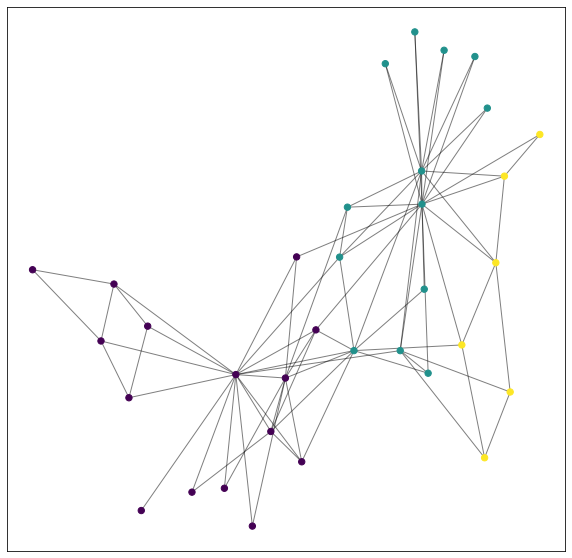

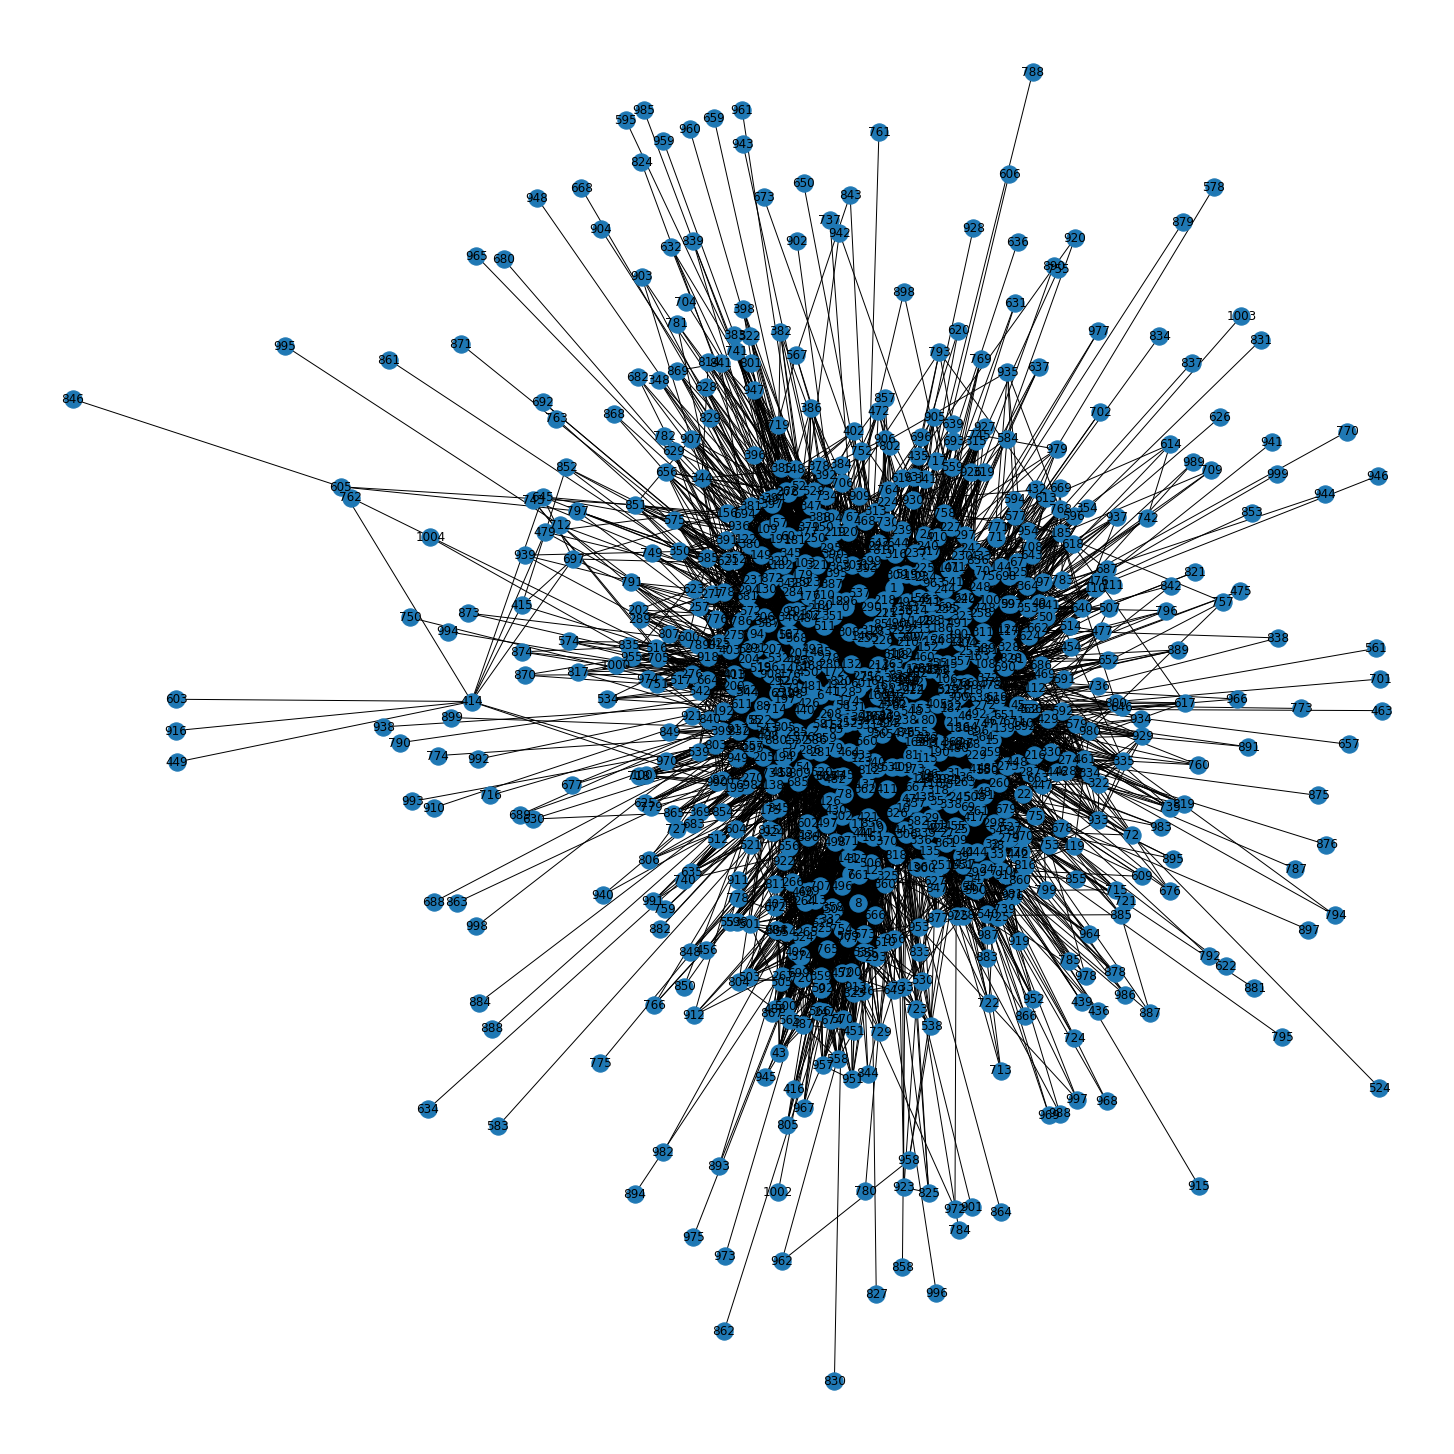



LEVEL  0
Number of communities in the partition:   0
Modularity of the graph:   0


KeyboardInterrupt: ignored

In [ ]:
data= [[[0 for i in range(3)] for j in range(3)] for k in range(4)]
org_graph=[]
res_graph=[]
louivan_graph=[]
gn_graph=[]
last_mod=[]
small=0.05
medium=0.01

for i in range(0,3):
  G,G0,G1=get_func(i)

  if len(G.nodes())>500:
    per=medium
  else:
    per=small

  org_graph.append(G)

  #myalgo
  mod_list,part,G1,lastmod=calc_algo1(G,G0,G1)
  res_graph.append(G1)
  last_mod.append(lastmod)
  print("\n\nFinal number of communities is:  ",part)
  print("Modularity values for every level of partitioning:\n",mod_list)
  print("Modularity of the next level:\n",lastmod)

  #Louis
  G,G0,G1=get_func(i)
  mod2,comp,N=Louis(G)
  print("\n\nNumber of the components in the partition:  ",N)
  print("Modularity of graph:  ",mod2)
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(10)
  pos = nx.spring_layout(G)
  cmap = cm.get_cmap('viridis', max(comp.values()) + 1)
  nx.draw_networkx_nodes(G, pos, comp.keys(), node_size=40,cmap=cmap, node_color=list(comp.values()))
  nx.draw_networkx_edges(G, pos, alpha=0.5)
  plt.show()
 
  G,G0,G1=get_func(i)
  threshold_mod=[]
  print("\n\nThreshold= ",per*100,"%")
  mod_list,part,G1,lastmod,part_draw=calc_algo2(G,G0,G1,int(per*len(G.nodes())))
  gn_graph.append(G1)
  print("\n\nFinal number of communities is:  ",part)
  print("Modularity values for every level of partitioning:\n",mod_list)
  print("Modularity of the next level:\n",lastmod)
  print("\n\n")
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(10)
  pos = nx.spring_layout(G)
  cmap = cm.get_cmap('viridis', max(part_draw.values()) + 1)
  nx.draw_networkx_nodes(G, pos, part_draw.keys(), node_size=40,cmap=cmap, node_color=list(part_draw.values()))
  nx.draw_networkx_edges(G, pos, alpha=0.5)
  plt.show()
  threshold_mod.append(mod_list[len(mod_list)-1])
  
  for T in range(2,101):
    G,G0,G1=get_func(i)
    print("\n\nThreshold= ",per*T*100,"%")
    mod_list,part,G1,lastmod,part_draw=calc_algo2(G,G0,G1,int(per*T*len(G.nodes())))
    gn_graph.append(G1)
    print("\n\nFinal number of communities is:  ",part)
    print("Modularity values for every level of partitioning:\n",mod_list)
    print("Modularity of the next level:\n",lastmod)
    print("\n\n")
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(10)
    pos = nx.spring_layout(G)
    cmap = cm.get_cmap('viridis', max(part_draw.values()) + 1)
    nx.draw_networkx_nodes(G, pos, part_draw.keys(), node_size=40,cmap=cmap, node_color=list(part_draw.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    threshold_mod.append(mod_list[len(mod_list)-1])
    if threshold_mod[T-1]<threshold_mod[T-2]:
      gn_graph.pop()
      break


In [ ]:
print(data)

In [ ]:
for each in data:
  print("\n Number of components in the partition:\t",each[0][2])
  print("\n Modularity values for every level of partitioning:\t",each[0][1])
  print("\n Modularity values for the next level:\t",last_mod[data.index(each)])

No. of nodes:	 115 	No. of edges:	 613


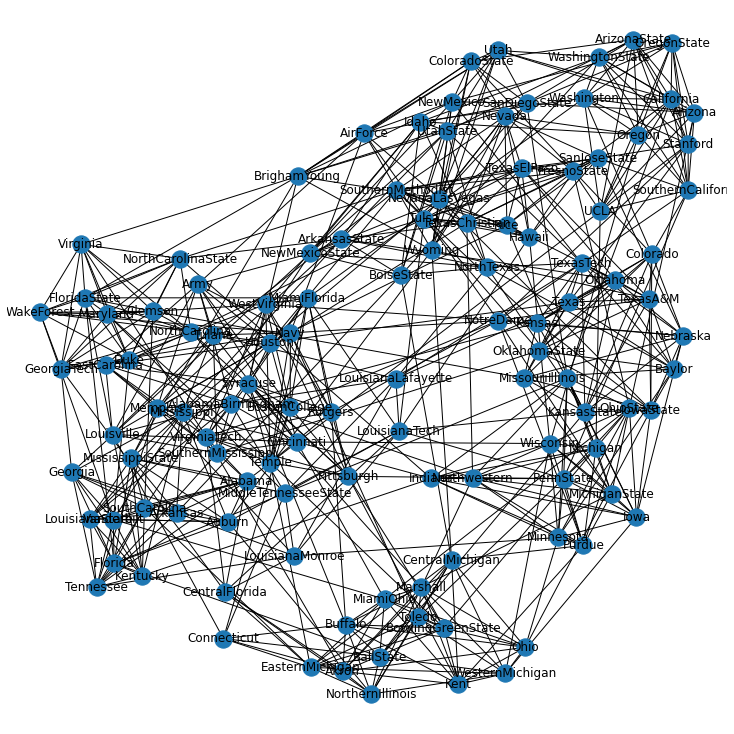





No. of nodes:	 34 	No. of edges:	 78


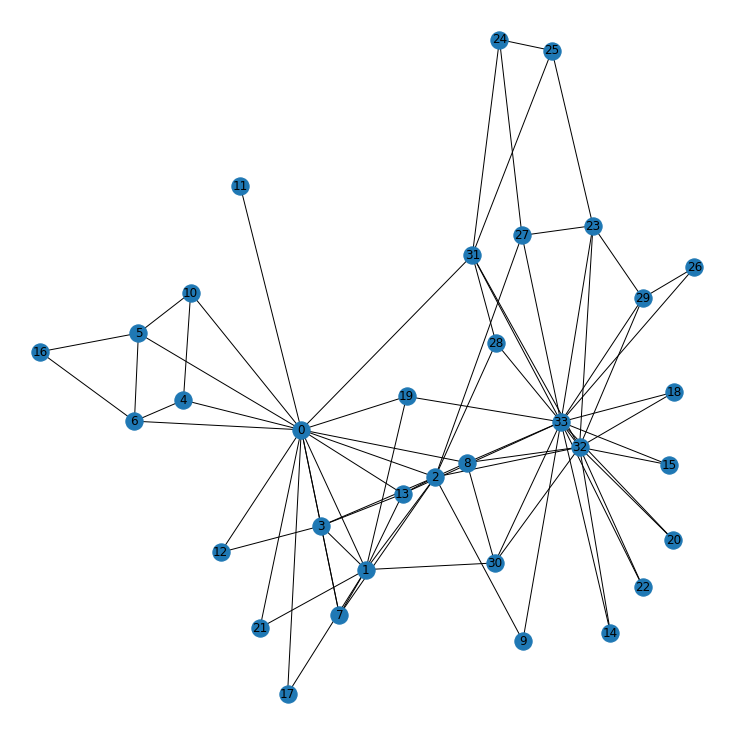





No. of nodes:	 986 	No. of edges:	 16687


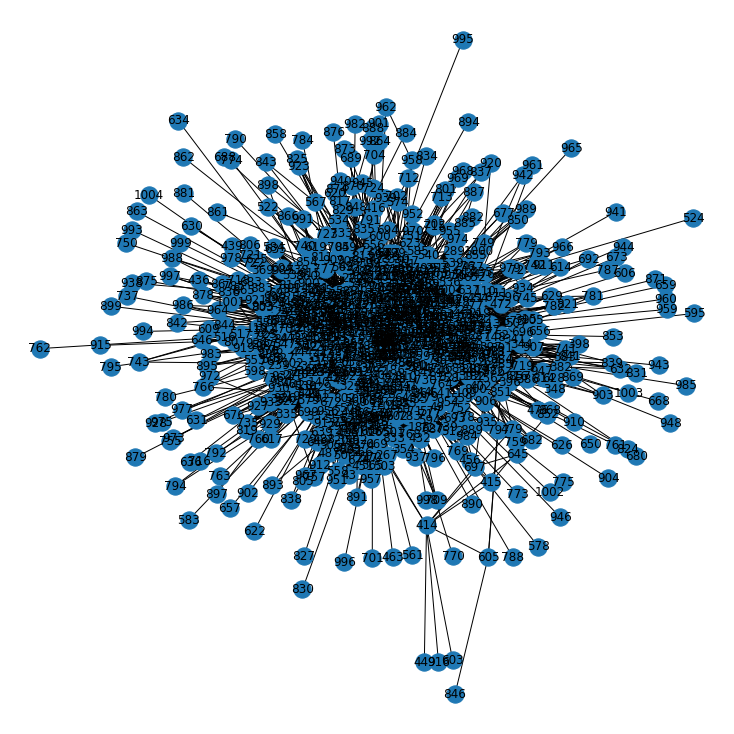

In [ ]:
for each in org_graph:
  print("No. of nodes:\t",len(each.nodes()),"\tNo. of edges:\t",len(each.edges()))
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(10)
  nx.draw(each,width=1, with_labels=True)
  plt.show()
  print("\n\n\n")

No. of nodes:	 115 	No. of edges:	 387


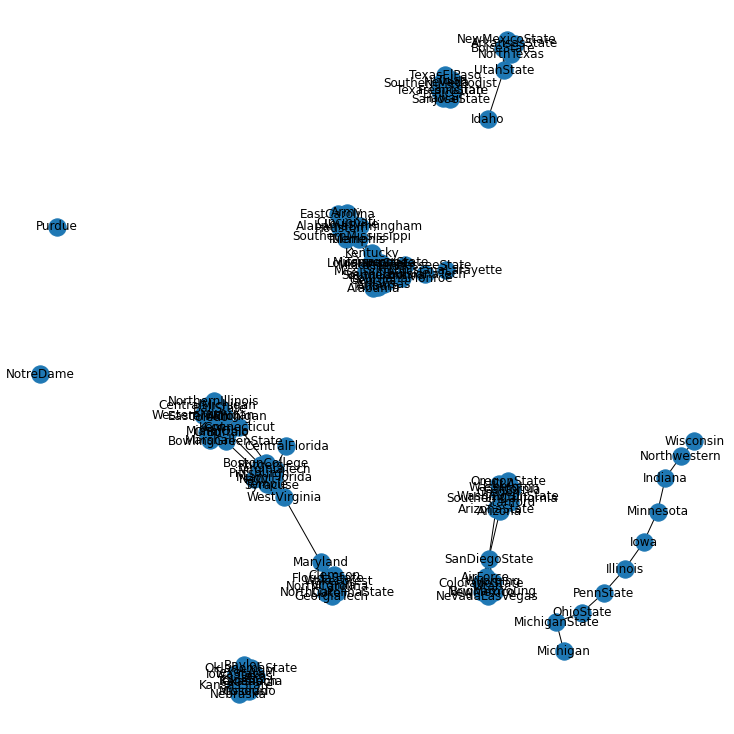





No. of nodes:	 34 	No. of edges:	 56


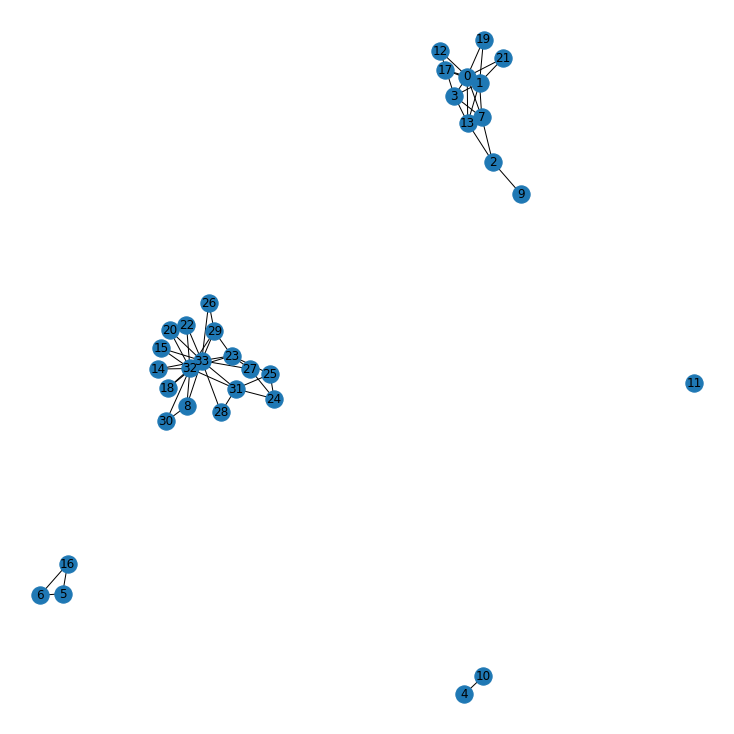

In [ ]:
for each in res_graph:
    print("No. of nodes:\t",len(each.nodes()),"\tNo. of edges:\t",len(each.edges()))
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(10)
    nx.draw(each,width=1, with_labels=True)
    plt.show()
    print("\n\n\n")

No. of nodes:	 115 	No. of edges:	 398


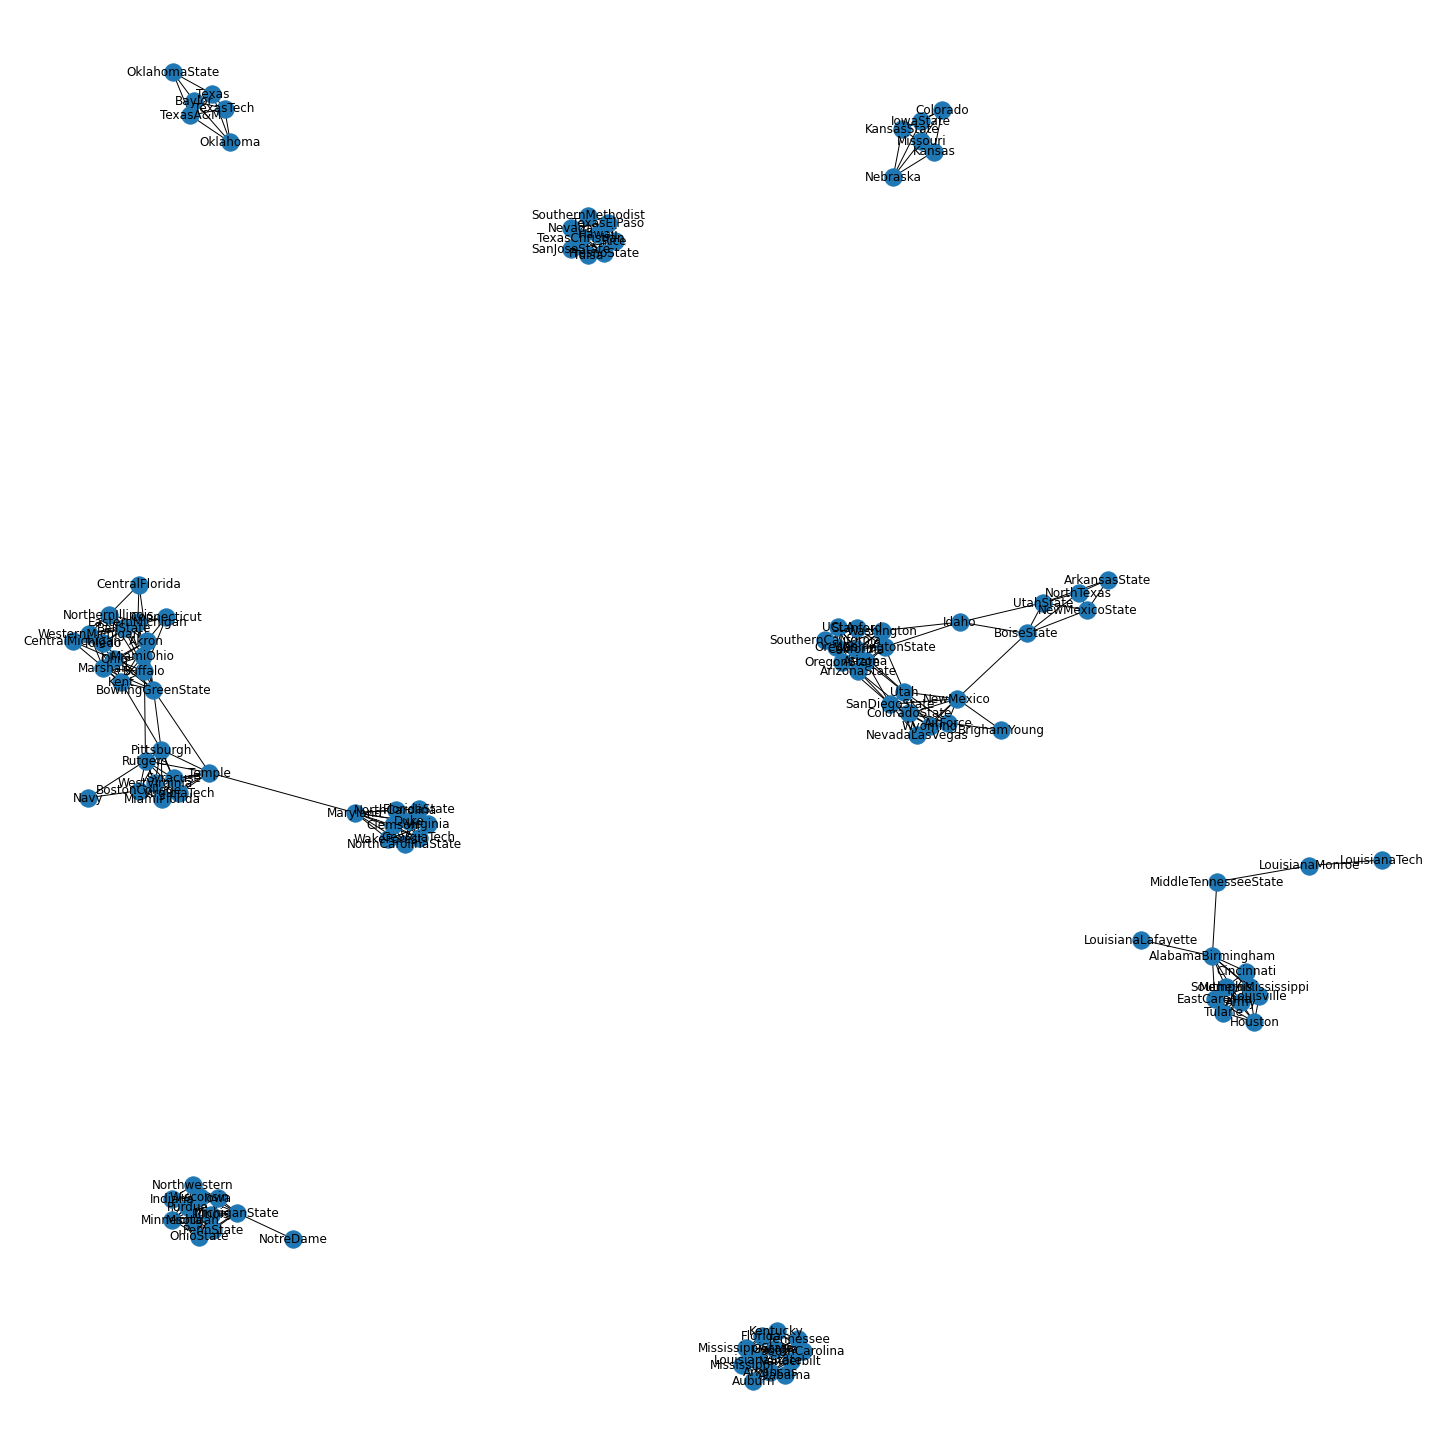





No. of nodes:	 115 	No. of edges:	 187


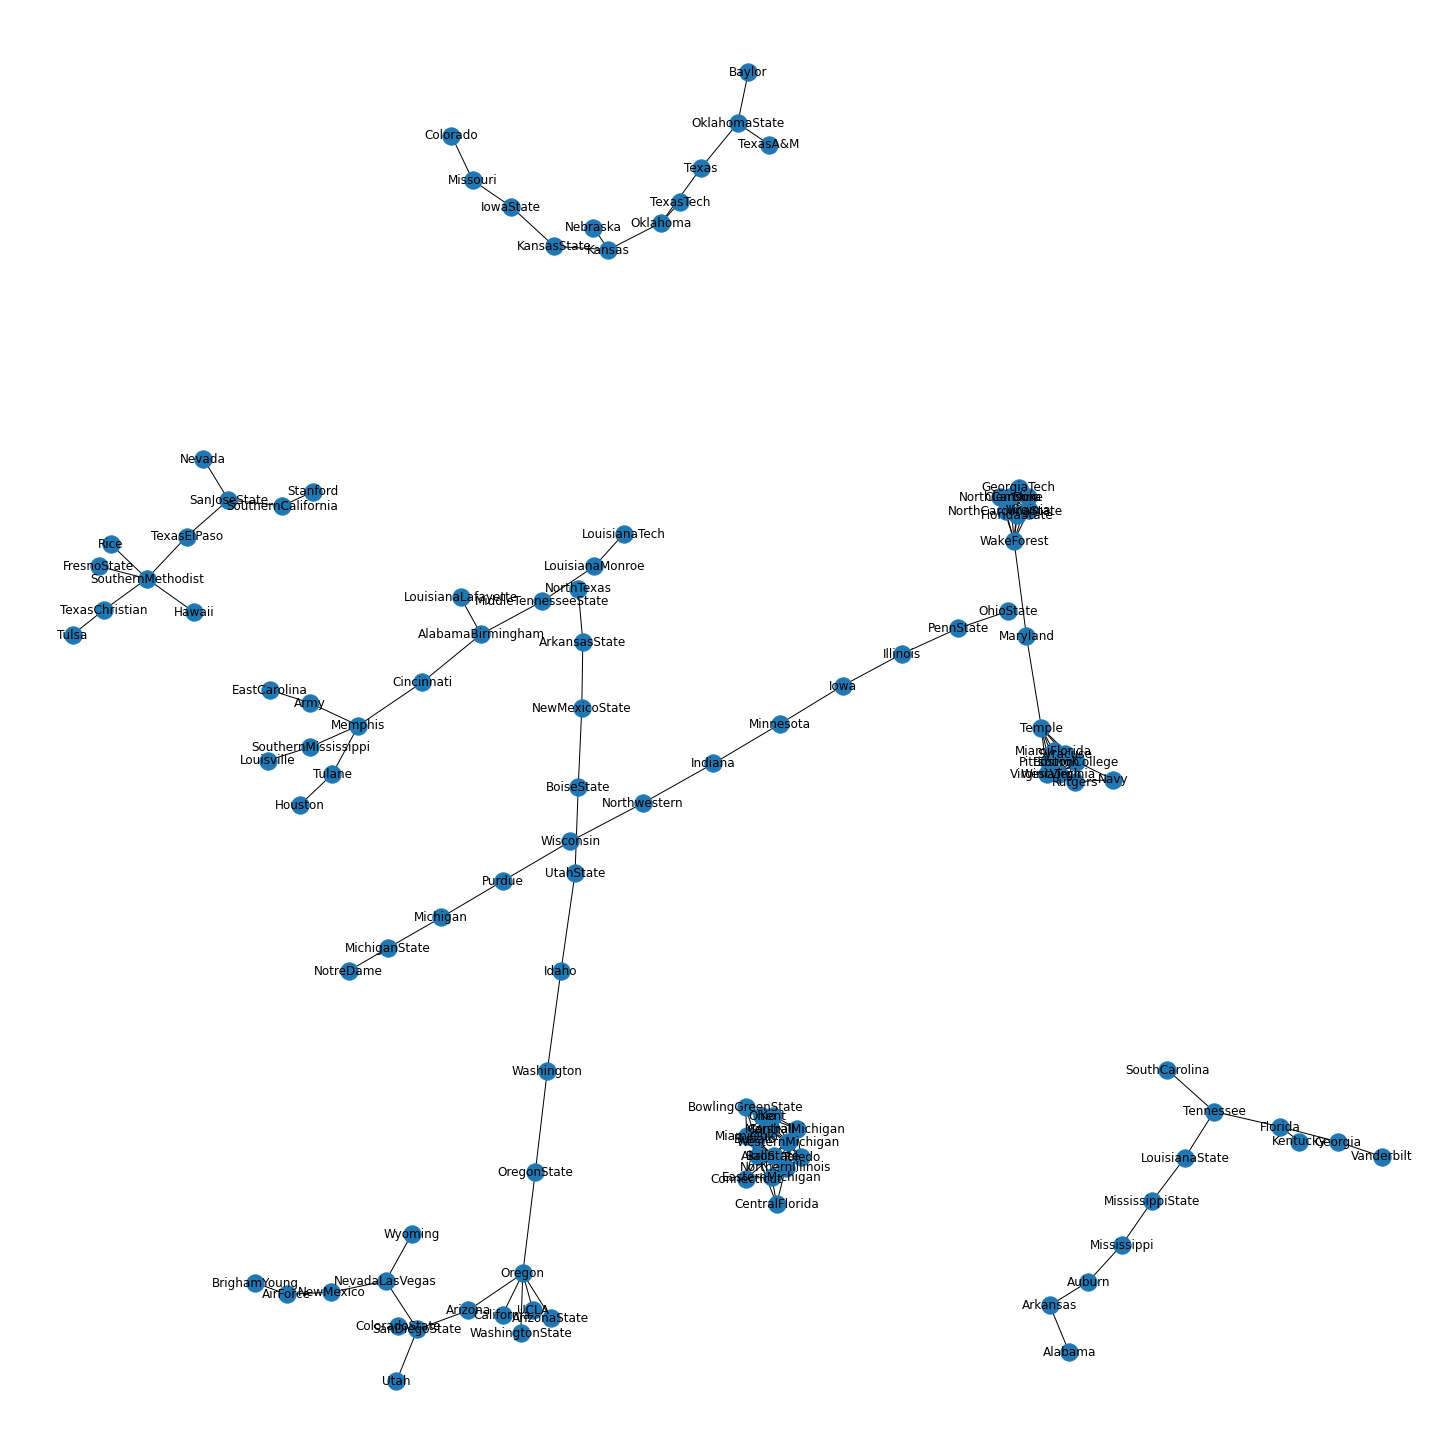





No. of nodes:	 34 	No. of edges:	 56


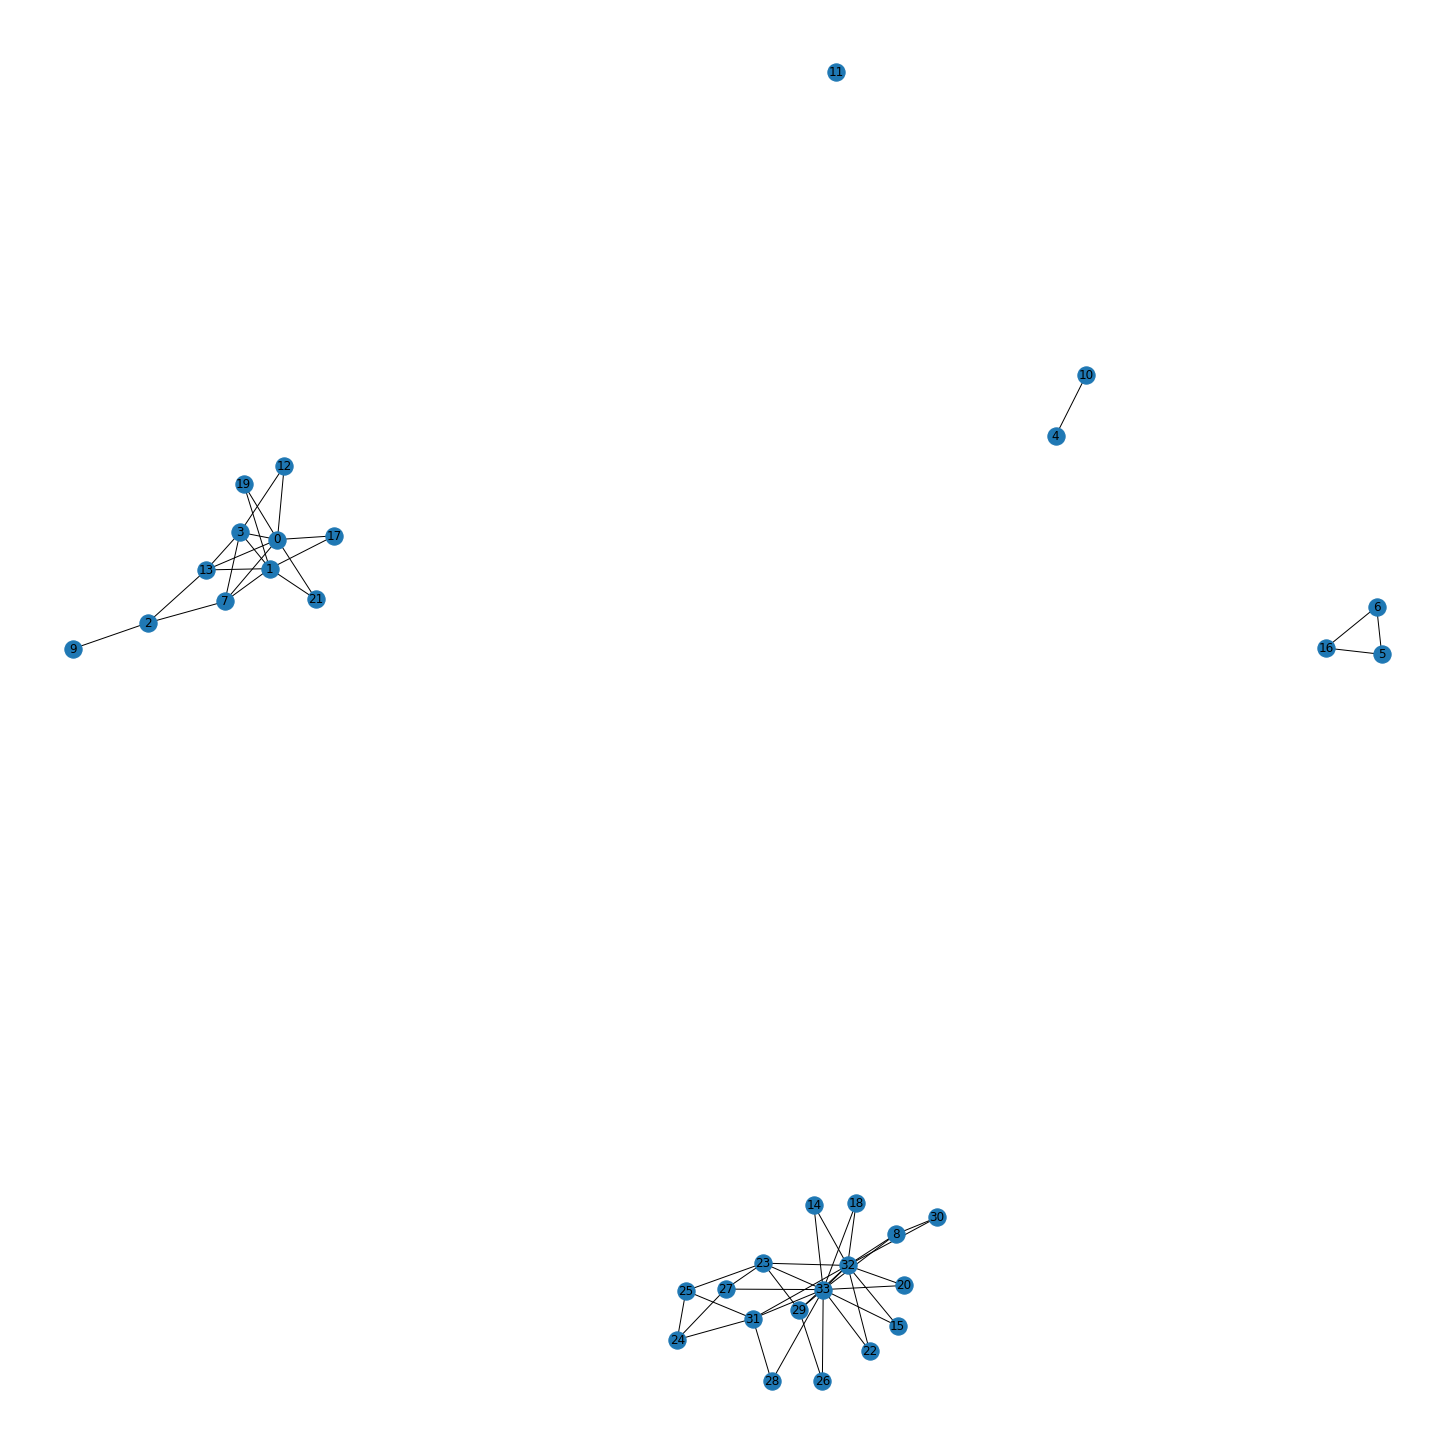





No. of nodes:	 34 	No. of edges:	 47


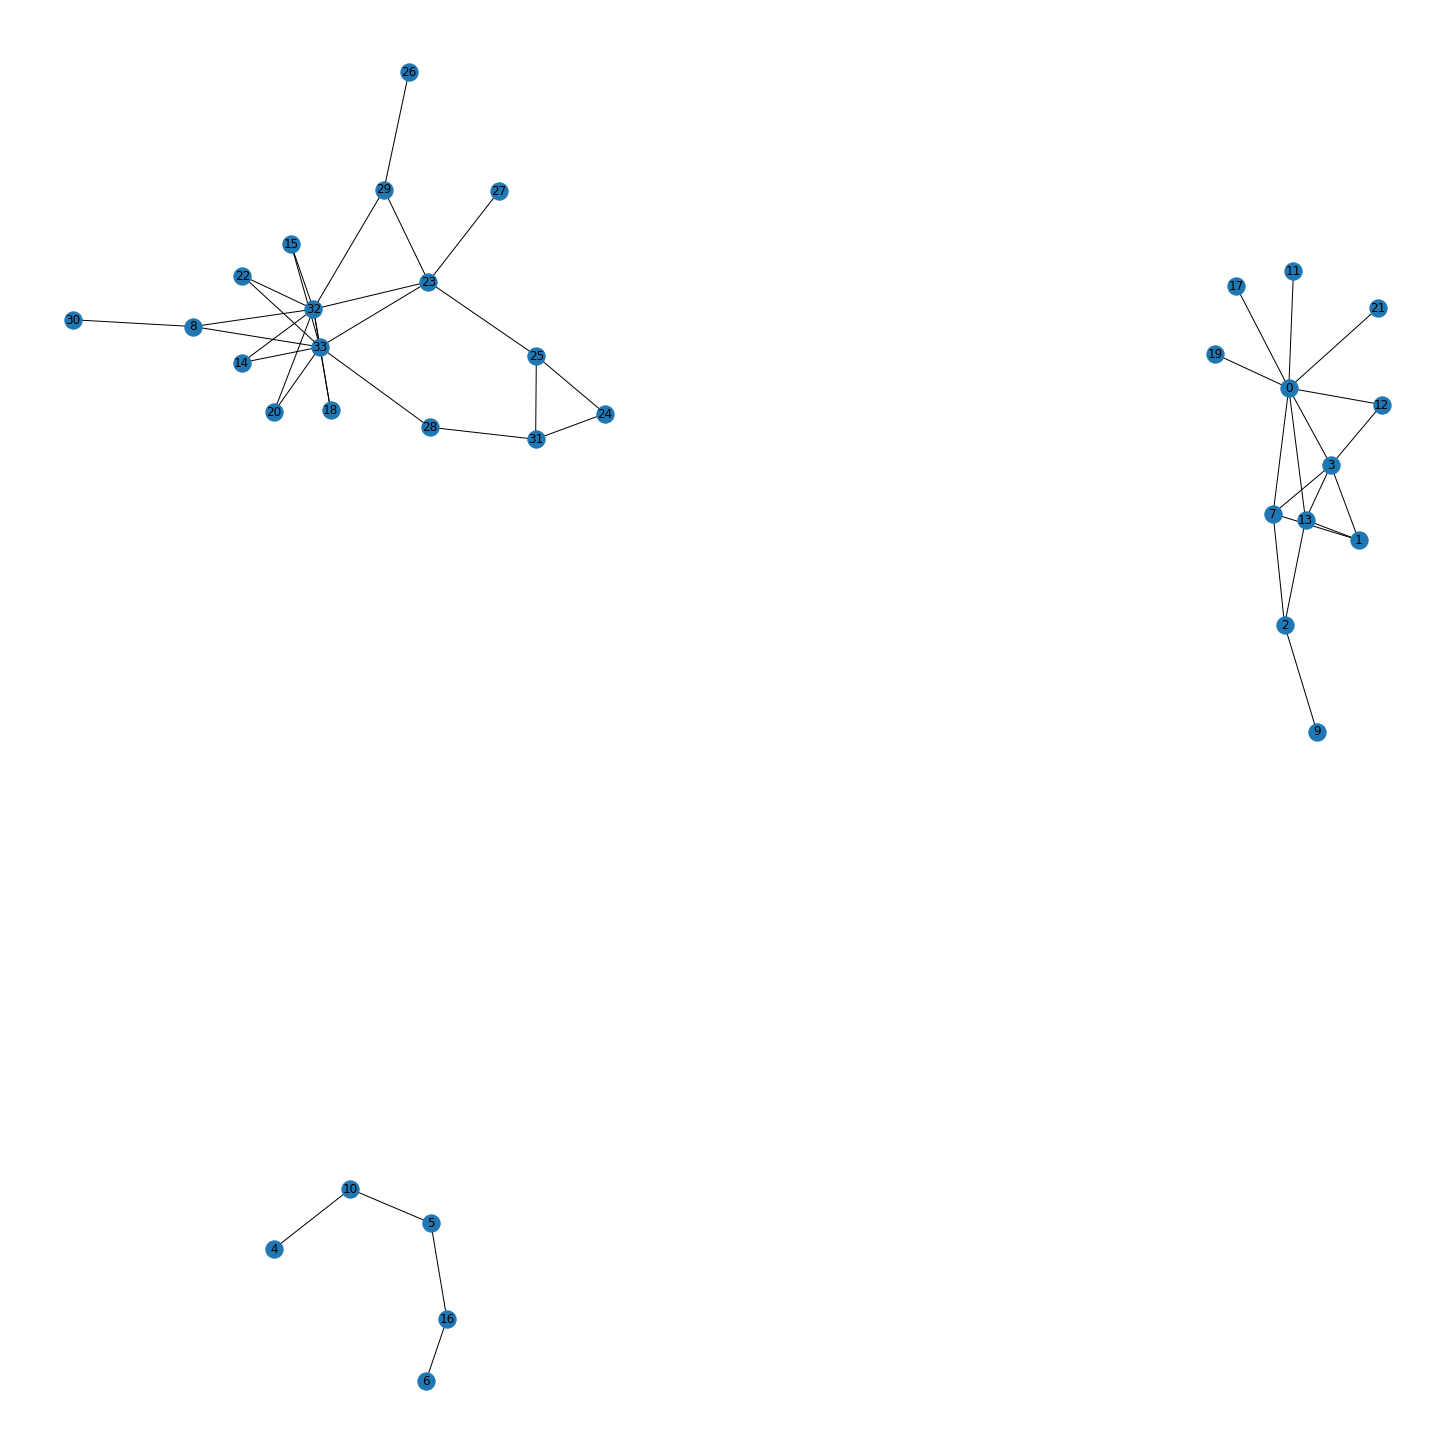





No. of nodes:	 34 	No. of edges:	 47


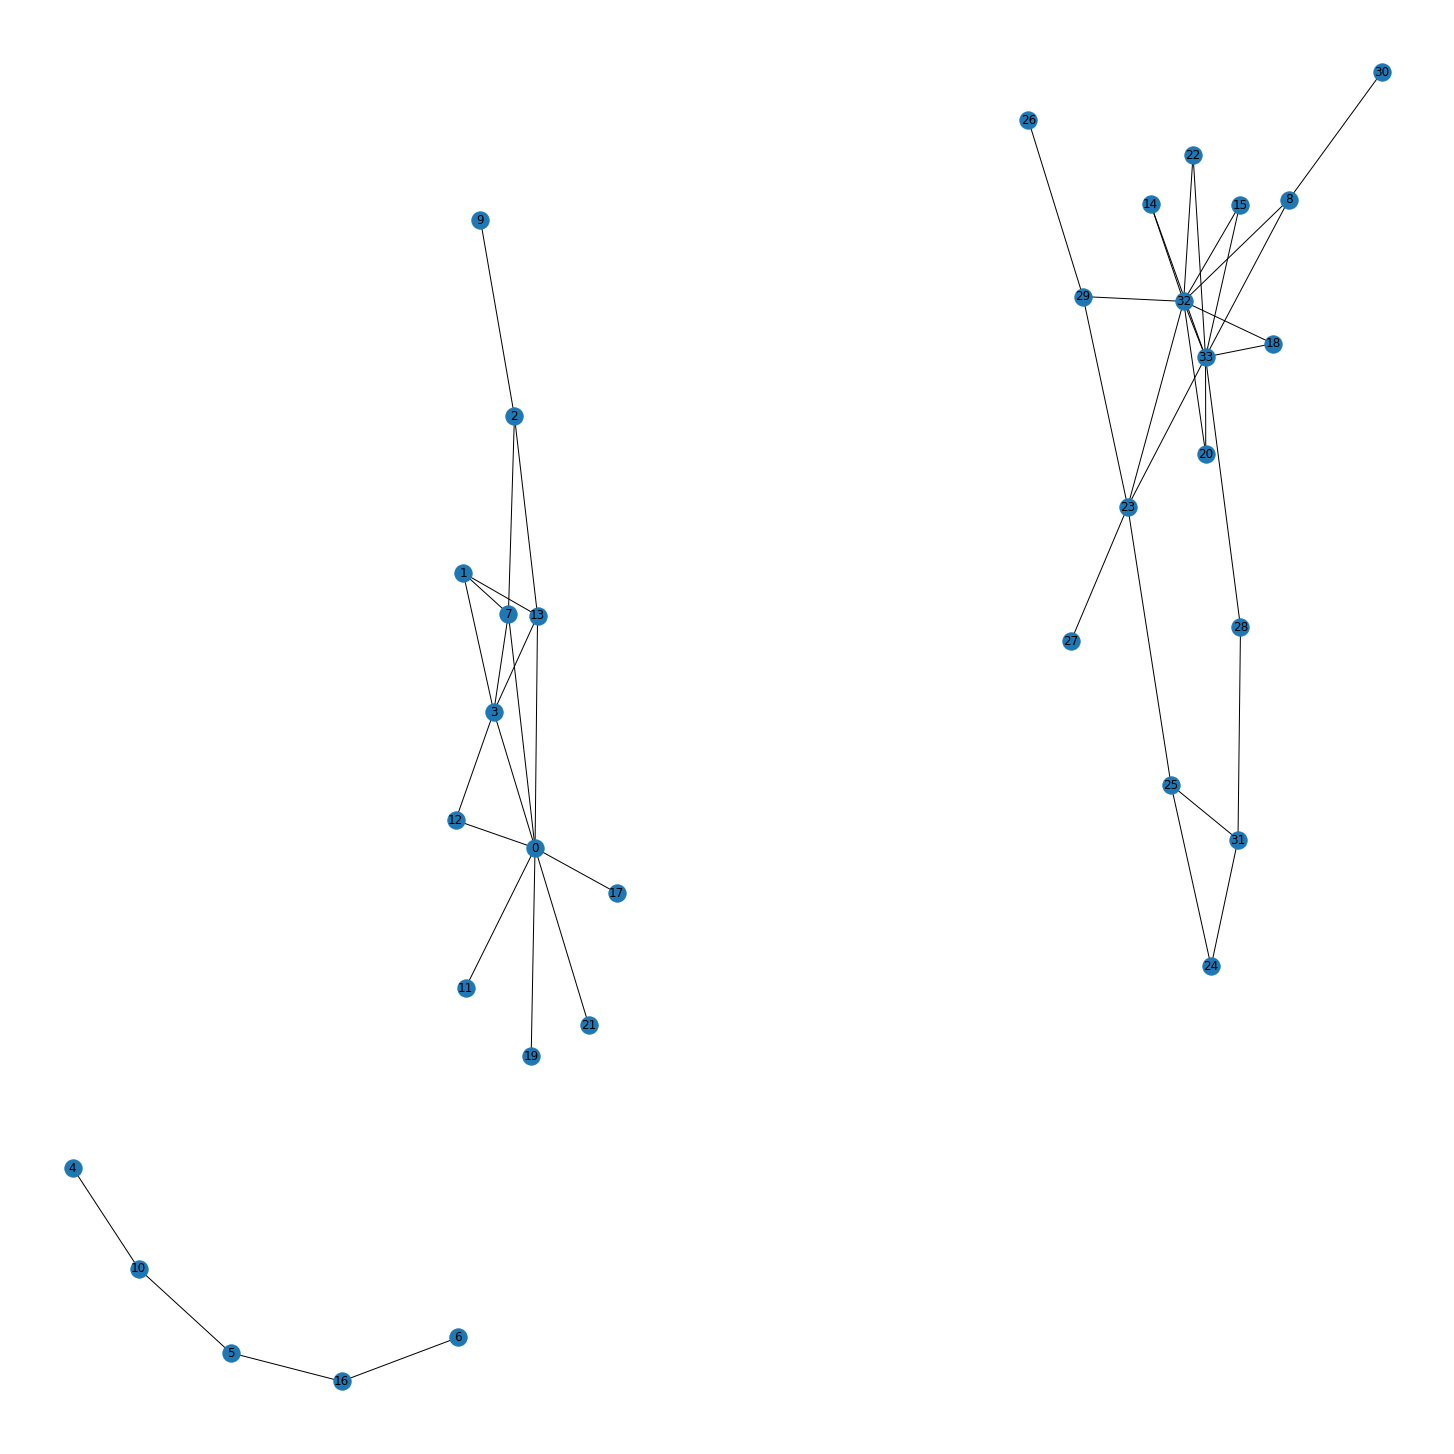

In [ ]:
for each in gn_graph:
    print("No. of nodes:\t",len(each.nodes()),"\tNo. of edges:\t",len(each.edges()))
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(20)
    nx.draw(each,width=1, with_labels=True)
    plt.show()
    print("\n\n\n")